# Statistics for Engineers

Tuorial at SRECon 2015

by Heinrich Hartmann

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)

np.random.seed(9221999)

import math
import seaborn as sns

## Heinrich Hartmann

* Twitter: [@HeinrichHartman](https://twitter.com/HeinrichHartman)
* Blog: [HeinrichHartmann.com](https://heinrichhartmann.com)

### Bio

* Phd in pure Mathematics (Mainz, Bonn, Oxford)

* Postdoc in IT (Koblenz)

* Freelance Consultant

* Data Scientist at Circonus.com

<img src="img/me.jpg" width="200px" style="margin-right:auto; margin-left:auto">

<img src="img/Circonus_Logo.png" style="margin-right:auto; margin-left:auto">



# Slides, Code and Data

Twitter: @HeinrichHartman

[TODO] Embed proper tweet.

<blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">Automated anomaly detection: A whole new way to monitor. Live at Booth 217. <a href="https://twitter.com/hashtag/chefconf?src=hash">#chefconf</a> <a href="https://twitter.com/ChefConf">@chefconf</a> <a href="https://twitter.com/circonus">@circonus</a> <a href="http://t.co/nOJrP6z1S5">pic.twitter.com/nOJrP6z1S5</a></p>&mdash; Circonus (@circonus) <a href="https://twitter.com/circonus/status/583724394222133249">April 2, 2015</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

GitHub: https://github.com/HeinrichHartmann/

# Outline

1. Summarizing Data Theory

2. Hands on Session

3. Probability Theory and Statistics

# SRE Challenges

* Check SLA: 95% Uptime.
  - Quantiles
  - Mean values
  - Means of mean values

* Capacity Planning
  - Regressions
  - Scatter plot
  - Forecasting

* Evaluate Changes
  - Compare response time before and after code change
  - A/B Testing

# Summarizing Data

Given a list of numbers $X=[x_1, \dots, x_n]$ how can we _understand_ the data?

* How many points are there?
* What are typical values?
* How large is the spread of the data?
* Is the data evenly distributed or clustered?
* Are there outliers?
* Are there trends?

### Ordered data

* Most data is comes ordered by time

* Questins where order is not important:
  - Mean value
  - Distribution

* Questions where order is important:
  - Trends
  - Periods

* Visualizion
  - Line plot

## Line plot of Request Rates

x= [ 789.73950195  778.48028564  820.66223145] ...
n= 76


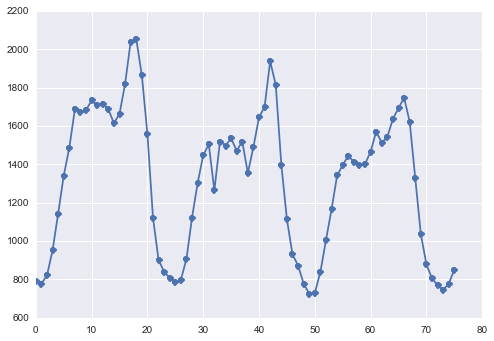

In [3]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print "x=", X[:3], '...'
print "n=", len(X)
plt.plot(X,'o-');

... to be continued

# Unordered data

* Forget about time dependence
* Requests to website (e.g. log files)


Visualization Method:
1. Rug Plot
2. Histograms
3. Kernel density estimation

## Rug Plots

Plot a vertical line 'rug' for each sample $x_i$ on a line.


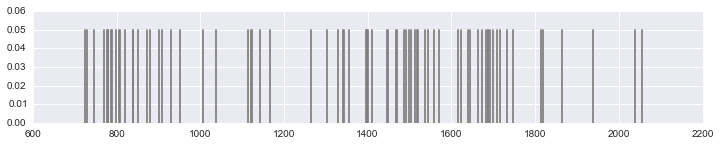

In [4]:
plt.figure(figsize=(12,2))
sns.rugplot(X, color="grey");

* Simple and accurate representation of data

### From Time Series to Rug Plots
1. Project point to y-axis
2. Rotate

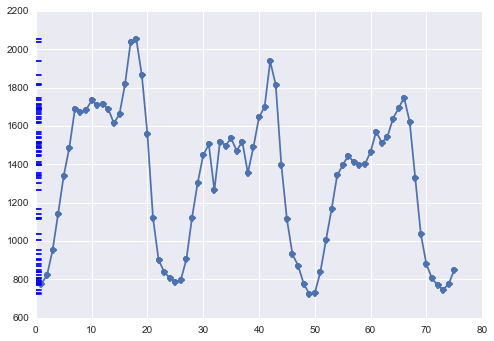

In [5]:
plt.plot(X,'o-')
sns.rugplot(X,axis='y', height=1, color="blue");

### Rug plot for discrete values is problematic

* Multiple values not visible.

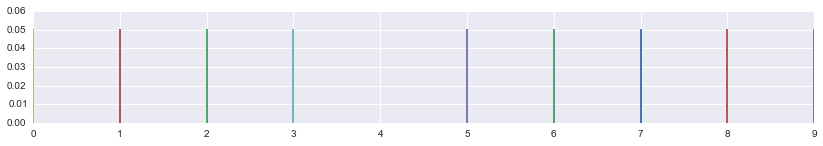

In [6]:
data_discrete = [1, 2, 1, 6, 0, 8, 0, 6, 5, 5, 9, 5, 7, 2, 9, 5, 0, 8, 8, 8, 8, 9, 3, 3 ] * 3
X = data_discrete

plt.figure(figsize=(14,2))
sns.rugplot(X);

### Jitter Trick

* Perturb each value by a random displacement.
* The displacement needs to be small in comparison to the distance between values.
* Can also use vertical displacement.

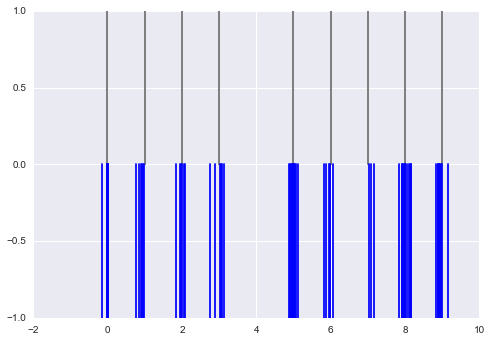

In [7]:
jitter = lambda x: [ v + 0.1 * np.random.normal() for v in x]

sns.rugplot(X, height=1, color='grey');
sns.rugplot(jitter(X), height=-1, color='blue');

## Histogram Visualization of Unordered Data

1. Divide data domain into bins.
2. Count number of datapoints per bin.
3. Plot bar chart of bin frequencies.

Advantags:
- Easy to visually comprehend
- Compare _area_ instead of number of rugs 

The choice of bins is crucial:

* What is the outer boundaries (`bin_min`, `bin_max`)?
* How many bins should we take?
* Should the bins have equal size? (> Need normalization if not)

# Implementation

In [8]:
# Step0: Take some data (same as above)
X = data_discrete
print X[:3], "..."

[1, 2, 1] ...


In [9]:
# Step1: Choose bins
# - bis are represented by pairs [a,b]
# - a is inclusive
# - b is exclusive
bins = [ [i,i+1] for i in range(11) ]
print "Bins:  ", bins[:3], "...", bins[-1]

Bins:   [[0, 1], [1, 2], [2, 3]] ... [10, 11]


In [10]:
# Step2: Count number of samples in bins
def count(X, bins):
    def findBin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None
    
    count = [0] * len(bins)
    for x in X:
        i = findBin(x, bins)
        if i != None:
            count[i] += 1

    return count

print "Counts:", count(X, bins)

Counts: [9, 6, 6, 6, 0, 12, 6, 3, 15, 9, 0]


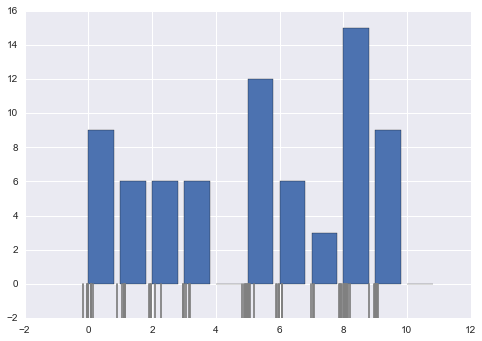

In [11]:
# Step3: Plot bar chart
def hist(X, bins, **kwargs):
    bin_left = [ left for left, right in bins ]
    plt.bar(bin_left, count(X, bins), **kwargs)


hist(X,bins)

# Add rugplot for comparison
sns.rugplot(jitter(X), height=-2, color='grey')
plt.show()

## Histogram of Request Rates

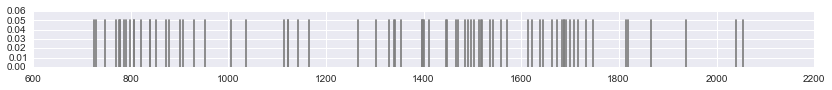

In [12]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

# Plot
plt.figure(figsize=(14,1))
sns.rugplot(X, color='grey')
plt.show()

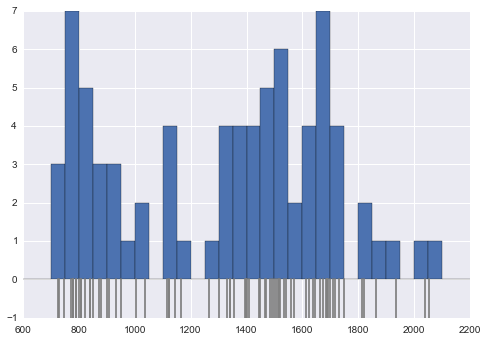

In [13]:
bin_min = 600
bin_max = 2200
bin_width = 50

bins = [ [i, i+bin_width] for i in range(bin_min, bin_max, bin_width) ]

hist(X,bins, width = bin_width)

sns.rugplot(X, color='grey', height=-1)
plt.show()

## Histograms with different bin width

Histogram with bin_width  10


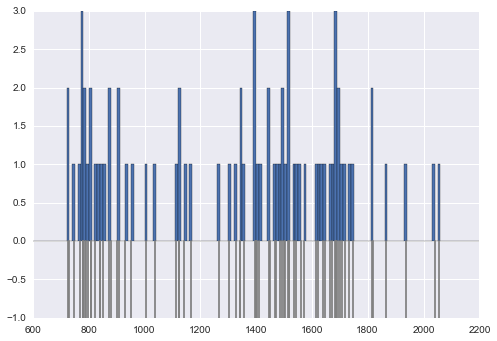

Histogram with bin_width  20


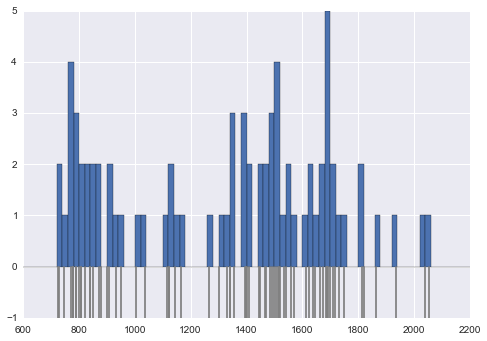

Histogram with bin_width  50


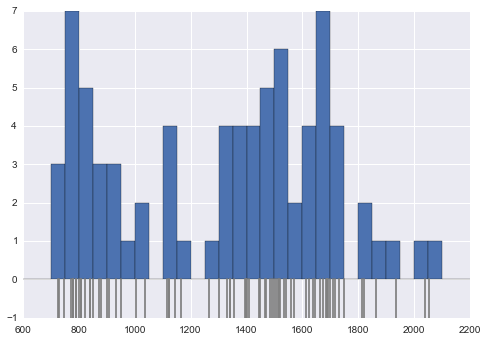

Histogram with bin_width  100


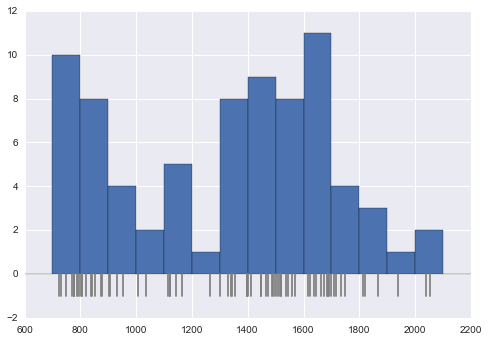

Histogram with bin_width  300


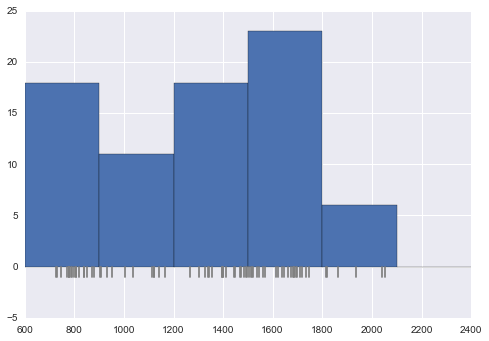

Histogram with bin_width  500


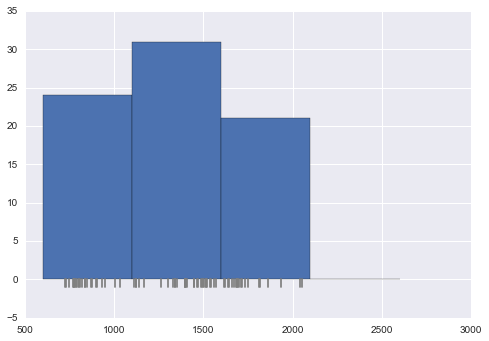

Histogram with bin_width  1000


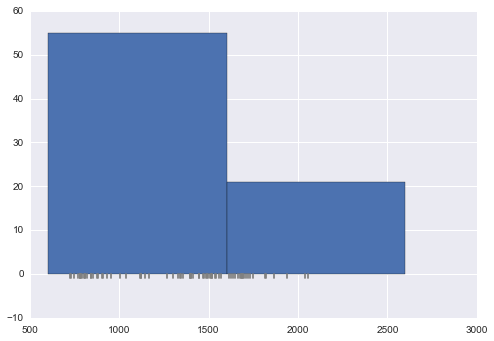

Histogram with bin_width  2000


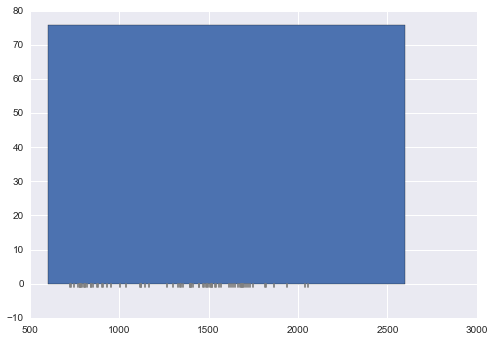

In [14]:
bin_min = 600
bin_max = 2200

def plot_hist(X,  bin_min, bin_max, bin_width):
    bins =[ [i, i+bin_width] for i in np.arange(bin_min, bin_max, bin_width) ]
    hist(X,bins,width=bin_width)
    sns.rugplot(X, color='grey', height=-1)
    print "Histogram with bin_width ", bin_width
    plt.show()

plot_hist(X, bin_min, bin_max, 10)
plot_hist(X, bin_min, bin_max, 20)
plot_hist(X, bin_min, bin_max, 50)
plot_hist(X, bin_min, bin_max, 100)
plot_hist(X, bin_min, bin_max, 300)
plot_hist(X, bin_min, bin_max, 500)
plot_hist(X, bin_min, bin_max, 1000)
plot_hist(X, bin_min, bin_max, 2000)

## Common bin-width choices

Remarks:
* Can convert `bin_count` and `bin_width` using relation $$ bin\_max - bin\_min = bin\_count \cdot bin\_width.$$

* Choices `bin_min=min(X)` and `bin_max=max(X)` are common.

Choices for bin-width:

* Excel: Let $n$ be the number of samples, then:

  $$ bin\_count = \sqrt{n} $$

* Scott's normal reference rule

  $$ bin\_width = \frac{3.5 \sigma}{n^{1/3}} $$

  where $\sigma$ is the standard deviation (cf. later).
  This is optimal for random samples of normally distributed data, in a certain sense.

* Freedman–Diaconis rule

  $$ bin\_width = \frac{2 IQR}{n^{1/3}} $$
  
  where IQR is the inter-quartile range (cf. later). Like Scott's rule but more robust agains outliers.

Excel rule
Histogram with bin_width  152.493649279


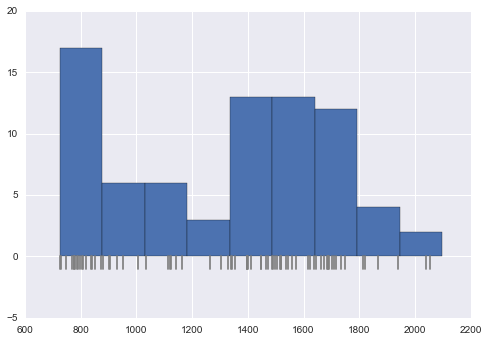

Scott's rule
Histogram with bin_width  309.50374768


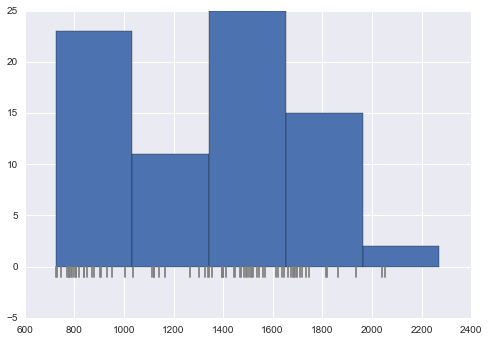

Freedman–Diaconis' rule
Histogram with bin_width  340.149900784


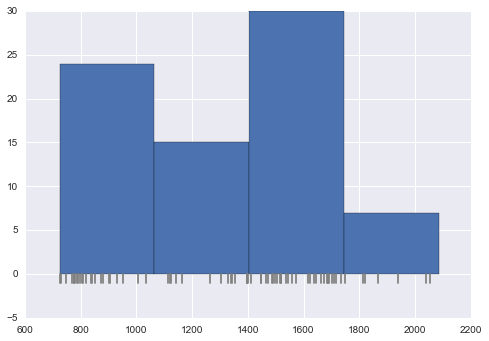

In [15]:
bin_min = min(X)
bin_max = max(X)

print "Excel rule"
plot_hist(X, bin_min, bin_max, (bin_max - bin_min)/math.pow(len(X),0.5))

print "Scott's rule"
plot_hist(X, bin_min, bin_max, 3.5 * np.std(X) / math.pow(len(X), 1./3))

print "Freedman–Diaconis' rule"
IQR = np.subtract(*np.percentile(X, [75, 25]))
plot_hist(X, bin_min, bin_max, 2 * IQR / math.pow(len(X), 1./3))

# Pragmatic Choice: Log sized bins

* Round values to n-significant digits to bin index

* Normailze count by bin size

* Good for float values (same scaling properties)


In [47]:
def find_log_bin(x):
    n = 2
    return round(x, -int(math.floor(math.log10(x))) + (n - 1))

print get_bin(0.123455)
print get_bin(12345)

0.12
12000.0


# Histograms as Heatmaps

* Can use color coding for bin count
* Allows to show many histograms at once
* Harder to read off values
* Log scale bins

<center><img src="img/Circonus_Histogram.png"/></center>

### Kernel Density Estimators

1. Replace 'rugs" with little functions (e.g. triangles, rectangles, normal-distributions)
2. Sum all functions

<center>
<img src="http://upload.wikimedia.org/wikipedia/en/4/41/Comparison_of_1D_histogram_and_KDE.png" width='400px'>

Source: Wikipdeia, CC BY-SA 3.0, by Drleft <br>
http://en.wikipedia.org/wiki/Kernel_density_estimation
</center>

Remarks:

* Smooth version of Histogram
* Better approximation for pdf (cf. later)
* More expensive to compute
* Harder to define
* Choices of function and width invloved. Similar to Histogram.


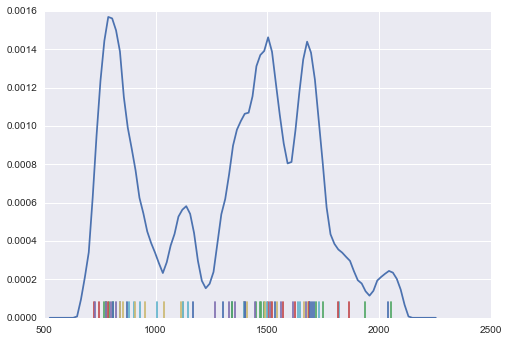

In [16]:
from sklearn.neighbors import KernelDensity

KDE=KernelDensity(kernel='epanechnikov', bandwidth=80)
KDE.fit(X[:,np.newaxis])
grid=np.linspace(min(X)-200, max(X)+200,100)
kde =np.exp(KDE.score_samples(grid[:,np.newaxis]))
plt.plot(grid, kde)
sns.rugplot(X)

# Summarizing unordered data

## Mean Values

The _mean value_ of $x_1, \dots, x_n$ is defined as

$$ \mu = mean(x_1, \dots, x_n) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative
 

mean= 1316.30863471


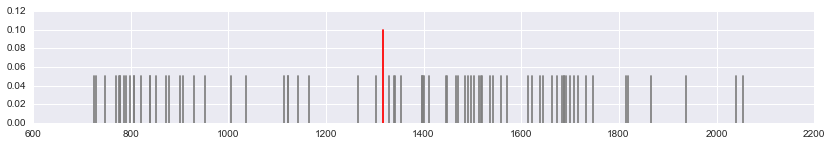

In [17]:
def mean(X):
    return float(sum(X)) / len(X)

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print "mean=", mean(X)

# Plot
def mark(m,height=0.1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color='grey')
    mark(mean(X))
    plt.show()

plot_mean(X)

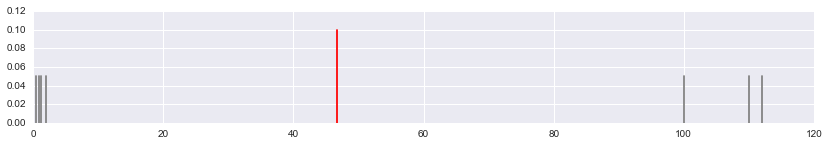

In [18]:
# Mean values can be atypical

plot_mean([1,2,0.4,1.2,100,110,112])

## Median

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \leq m \} = \# \{ i \,|\, x_i \geq m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).

A median can be computed as follows:

1. Let $S = sort(x_1, \dots, x_n)$, so that $s_1 \leq s_2 \leq \dots \leq s_n$.

2. If $n$ is odd then $m = s_{(n+1)/2}$ is the unique median.

3. If $n$ is even, and $a = floor(\frac{n+1}{2})$ and $b = ceil(\frac{n+1}{2})$ are the middle indices, then every number $m$ with 
  $$s_a \leq m \leq s_b$$
  is a median.
  
Remark:

* Median is not unique
* Not influenced by outliers (robust)

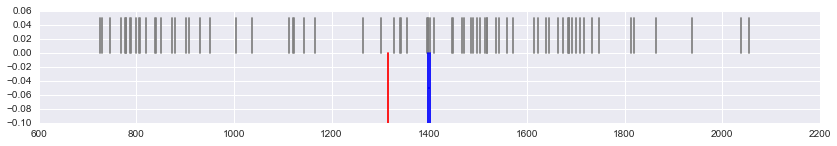

In [19]:
# Caution: Index start at 0 in python!
def median_min(X):
    S = sorted(X)
    n = len(X)
    return S[int(math.floor((n+1)/2.))-1]

def median_max(X):
    S = sorted(X)
    n = len(X)
    return S[int(math.ceil((n+1)/2.))-1]

def plot_mean_med(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color='grey')
    mark(mean(X),-0.1, 'r')
    mark(median_max(X),-0.1,'b')
    mark(median_min(X),-0.1,'b')
    plt.plot([median_min(X),median_max(X)],[0-.05,-0.05],'b--')
    plt.show()

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
plot_mean_med(X)

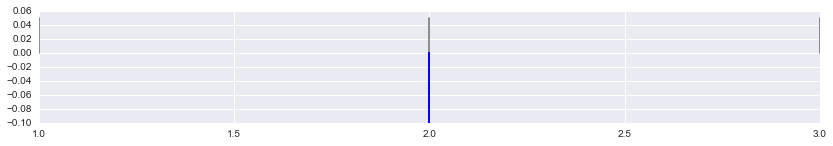

In [20]:
# odd case
plot_mean_med([1,2,3])

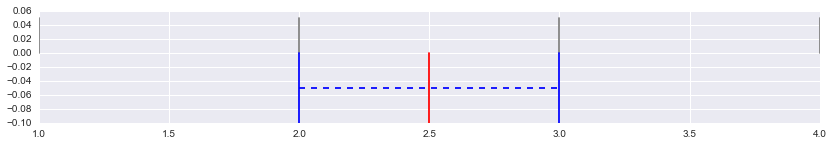

In [21]:
# even case
plot_mean_med([1,2,3,4])

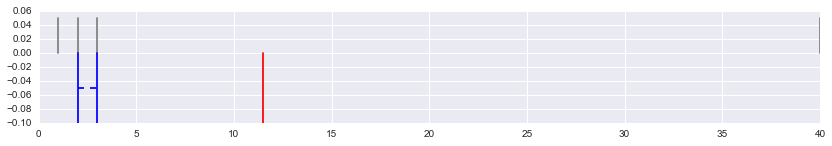

In [22]:
# With an outlier
plot_mean_med([1,2,3,40])

# Deviation Measures

1. The _maximal deviation_ is defined as
   $$ maxdev(x_1,\dots,x_n) = max \{ |x_i - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as
   $$ mad(x_1,\dots,x_n) = \frac{1}{n} \sum_{i=1}^n |x_i - \mu|.$$

3. The _standard deviation_ is defined as
   $$ \sigma = stddev(x_1,\dots,x_n) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}.$$


* Measure the 'typical' displacement from the mean value.
* Standard deviation popular because it has nice mathematical properties.

Maximal deviation
mean =  1316.30863471
dev  =  738.072957089


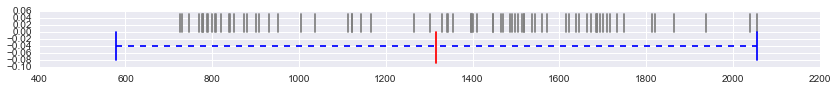

Mean Absolute Deviation
mean =  1316.30863471
dev  =  327.4656915


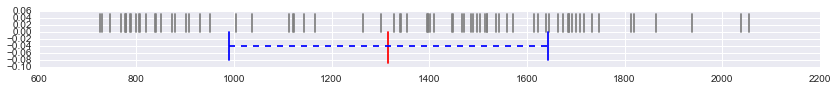

Standard Deviation
mean =  1316.30863471
dev  =  374.572363954


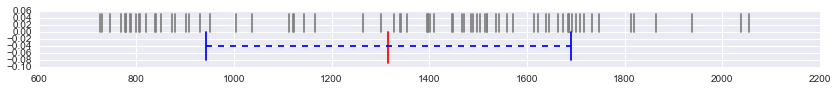

In [23]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

def plot_mean_dev(X, m, s):
    print "mean = ", m
    print "dev  = ", s
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey')
    plt.plot([m,m],[0,-0.09],'r-' )
    plt.plot([m-s,m-s],[0,-0.08],'b-')
    plt.plot([m+s,m+s],[0,-0.08],'b-')
    plt.plot([m-s,m+s],[-0.04,-0.04],'b--')
    plt.show()
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))


mean =  0.130393932033
dev  =  0.777701969725


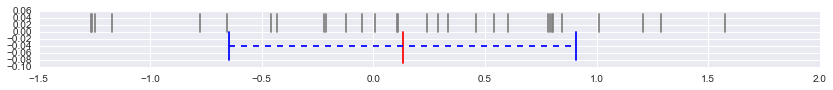

In [24]:
# Standard deviation is a good deviation for normal distributed data
X = [ np.random.normal() for x in range(30) ]
plot_mean_dev(X,mean(X),stddev(X))

mean =  3.35199412777
dev  =  17.6620085114


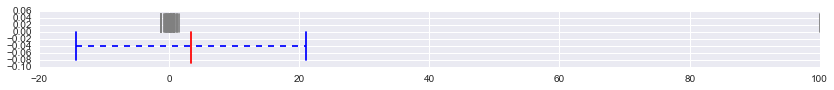

In [25]:
# Large effect on Outliers
X = X + [100]
plot_mean_dev(X,mean(X),stddev(X))

mean =  3.43714285714
dev  =  6.83795858067


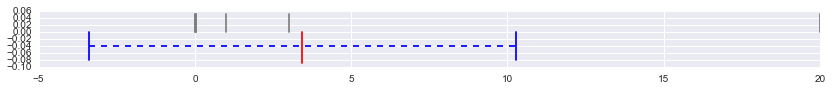

In [26]:
# No good description for 'skew' data
X = [0,0.01,0.02,0.03,1,3,20]
plot_mean_dev(X,mean(X), stddev(X))

## Caution with Standard Deviation

cf. Janert, Data Science at the Command Line.

- Everybody Learns about standard deviation in school
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!

## War Story:
- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

### Digression: p-deviations

$$ \sigma_p=dev_p(x_1,\dots,x_n) =  (\frac{1}{n} \sum_{i=1}^n |x_i - \mu|^p)^{1/p}, \quad 1 \leq p \leq \infty $$

* $\sigma_1$ is the mean absolute deviation
* So $\sigma_2 = \sigma$ stddev.
* $\sigma_\infty$ is the max-deviation

In [27]:
import math
def pdev(X, p=2):
    m = mean(X)
    return math.pow(sum( math.pow(abs(x - m),p) for x in X)/ len(X), 1./p) 


X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print "     mean_abs_dev =", mad(X)
for p in [1,1.5,2,3,5,10,100]:
    print "p = %3d      pdev = %.3f" % (p , pdev(X,p))
print "          max-dev =", max_dev(X)

     mean_abs_dev = 327.4656915
p =   1      pdev = 327.466
p =   1      pdev = 353.362
p =   2      pdev = 374.572
p =   3      pdev = 407.987
p =   5      pdev = 455.236
p =  10      pdev = 530.342
p = 100      pdev = 707.648
          max-dev = 738.072957089


# Quantiles

Let $0\leq q \leq 1$ be a real number. A $q$-quantile for $X$ is a value $y$ such that, if

$$ \#\{i \,|\, x_i \leq y \} \geq q \cdot n  $$

and

$$ \#\{i \,|\, x_i \geq y \} \geq (1-q) \cdot n $$

Roughly speaking, $y$ divides $X$ in $q \cdot n$ samples that are lower than $y$ and $(1-q) \cdot n$ samples that are larger than $y$.

Examples:

* The minimum is a 0-quantile
* A median is a 0.5-quantile
* The maximum is a 1-quantile

Special names:

* Quartiles: $k/4$-quantiles
* Percentiles: $k/100$-quantiles

# Computation of Quantiles

Let `S = sorted(X)` be the sorted version of $X$, then both

* $s_a$ for $a = floor(q \cdot (n + 1))$, and
* $s_b$ for $b = ceil(q \cdot (n + 1))$ 

are q-quantiles for X if they lie in $1 .. n$.

* Quantiles always exists
* Non unique (like median)
* Lot's of ways to choose a quantile function, i.e. interpolate between s_a and s_b cf.  
  http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

In [28]:
def min_quantile(q,X):
    S = sorted(X)
    n = len(X)
    d = int(math.floor(q * (n + 1)))
    if d == 0:   return S[0]
    if d == n+1: return S[-1]
    return S[d-1]
    
def max_quantile(q,X):
    S = sorted(X)
    n = len(X)
    d = int(math.ceil(q * (n + 1)))
    if d == 0:   return S[0]
    if d == n+1: return S[-1]
    return S[d-1]

def quantile(q,X):
    return (max_quantile(q,X) + min_quantile(q,X)) / 2.

In [29]:
def plot_quantiles(X,Q):
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=1)
    for q in Q:
        yr = min_quantile(q,X)
        yl = max_quantile(q,X)
        y = (yr + yl) / 2.
        print "{}-Qunatile \t= [{:.1f} <- {:.2f} -> {:.1f}]".format(q,yr,y,yl)
        plt.plot([y,y],[0,-1],'b-')
    plt.show()

0-Qunatile 	= [-1.0 <- -1.00 -> -1.0]
0.1-Qunatile 	= [-1.0 <- -1.00 -> -1.0]
0.5-Qunatile 	= [-1.0 <- 0.00 -> 1.0]
0.9-Qunatile 	= [1.0 <- 1.00 -> 1.0]
1-Qunatile 	= [1.0 <- 1.00 -> 1.0]


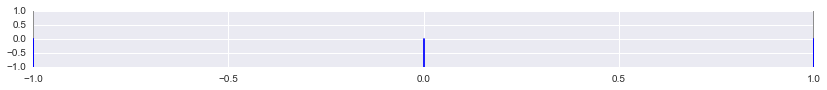

In [30]:
# Example -1, 1
plot_quantiles([-1,1],[0,0.1,0.5,0.9,1])

0-Qunatile 	= [1.0 <- 1.00 -> 1.0]
0.1-Qunatile 	= [1.0 <- 1.00 -> 1.0]
0.5-Qunatile 	= [2.0 <- 2.50 -> 3.0]
0.9-Qunatile 	= [4.0 <- 4.00 -> 4.0]
1-Qunatile 	= [4.0 <- 4.00 -> 4.0]


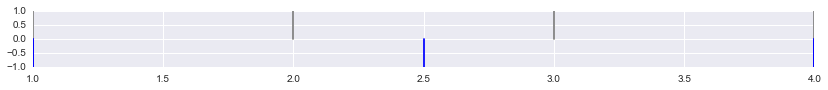

In [31]:
# Example 2
plot_quantiles([1,2,3,4],[0,0.1,0.5,0.9,1])

0-Qunatile 	= [725.0 <- 724.97 -> 725.0]
0.1-Qunatile 	= [778.6 <- 782.86 -> 787.2]
0.5-Qunatile 	= [1398.1 <- 1399.66 -> 1401.2]
0.9-Qunatile 	= [1733.2 <- 1740.55 -> 1747.9]
1-Qunatile 	= [2054.4 <- 2054.38 -> 2054.4]


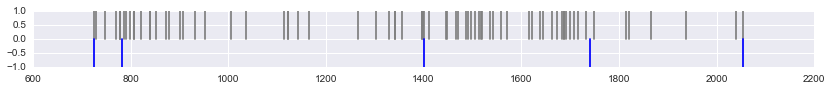

In [32]:
# Example Request Rate Data
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
plot_quantiles(X,[0,0.1,0.5,0.9,1])

## Boxplot

* Median
* Box around 0.25 and 0.75 Quantiles
* "whiskers" from min to max

Usually shown in vertical direction.

Allows visual clues:

* Where is the data concentracted?
* How far is it spread?
* How skew is the data?

0-Qunatile 	= [725.0 <- 724.97 -> 725.0]
0.25-Qunatile 	= [901.7 <- 904.50 -> 907.3]
0.5-Qunatile 	= [1398.1 <- 1399.66 -> 1401.2]
0.75-Qunatile 	= [1622.3 <- 1630.39 -> 1638.5]
1-Qunatile 	= [2054.4 <- 2054.38 -> 2054.4]


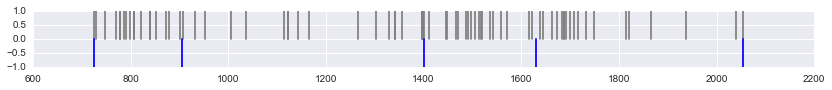

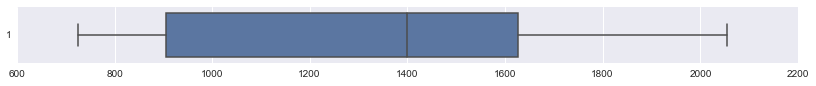

In [33]:
plot_quantiles(X,[0,0.25,0.5,0.75,1])
plt.show()

plt.figure(figsize=(14,1))
sns.boxplot(X, vert=False)
plt.show()

0-Qunatile 	= [-3.2 <- -3.25 -> -3.2]
0.25-Qunatile 	= [-0.7 <- -0.74 -> -0.7]
0.5-Qunatile 	= [-0.1 <- -0.08 -> -0.1]
0.75-Qunatile 	= [0.5 <- 0.50 -> 0.5]
1-Qunatile 	= [3.5 <- 3.47 -> 3.5]


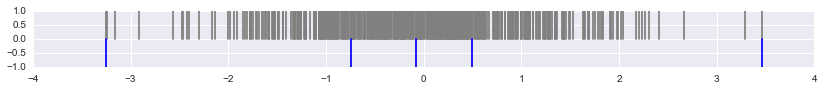

In [34]:
# Normal distributed data
plt.figure(figsize=(14,1))
X = [np.random.normal() for x in xrange(500)]
plot_quantiles(X,[0,0.25,0.5,0.75,1])
plt.show()

# - centered around 0
# - small box compared to whiskers
# - Q(0.25) ~ -0.67 and Q(0.75) ~ 0.67

# Box plots a Hisogram Series

<img src="img/Circonus_Histogram_Box.png"/>

## Outliers

The interquartile range of a sample X is defined as:

`IQR(X) = Q(0.75,X) - Q(0.25,X)`

It is a robust measure for variance of the data.

**Def.** (Tukey, 1969) a k-outlier is a data point X which is either

* larger than `Q(0.75) + k * IQR(X)` or
* smaller than `Q(0.25) - k * IQR(X)`.

An outlier (without k) is an 1.5-outlier.

In [35]:
def IQR(X): return quantile(0.75,X)-quantile(0.25,X)

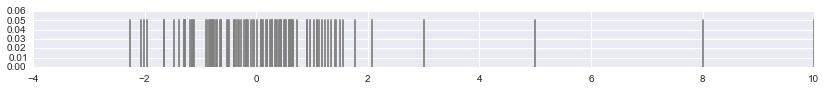

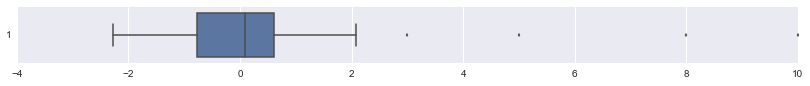

In [36]:
# Tukey Boxplots show outliers as 'points' outside the whiskers
plt.figure(figsize=(14,1))
X = [np.random.normal() for x in xrange(100)] + [5,3,8,10]
sns.rugplot(X, color='grey')
plt.show()
plt.figure(figsize=(14,1))
sns.boxplot(X, vert=False)

# Comparing Distributions

Give two sets of samples $X=[x_1,\dots,x_n]$ and $Y=[y_1,\dots,y_n]$ how similar are the distributions?

* API Latencies before change / after change

Visualizations:

* Histograms
* Box Plots
* QQ-Plot

In [219]:
!csvstat DataSets/HistogramAPI_samples_1.csv
!csvstat DataSets/HistogramAPI_samples_10.csv

  1. 0.805159310053
	<type 'float'>
	Nulls: False
	Min: 1.00566974632
	Max: 7435.04197491
	Sum: 3116665.68245
	Mean: 42.4059225325
	Median: 32.4558037808
	Standard Deviation: 185.519353426
	Unique values: 73496

Row count: 73496
  1. 0.802714302757
	<type 'float'>
	Nulls: False
	Min: 1.0014757437
	Max: 7650.93800677
	Sum: 4614942.31823
	Mean: 54.7462225017
	Median: 48.2711093095
	Standard Deviation: 122.511711685
	Unique values: 84297

Row count: 84297


In [220]:
X = np.loadtxt("DataSets/HistogramAPI_samples_1.csv", delimiter=",")
Y = np.loadtxt("DataSets/HistogramAPI_samples_10.csv", delimiter=",")

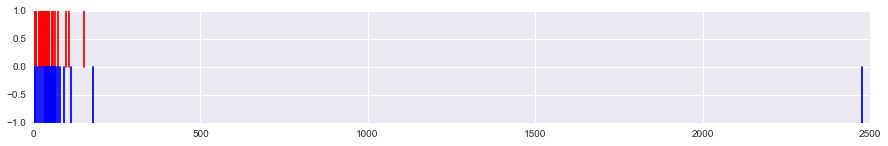

In [221]:
plt.figure(figsize=(15,2))
sns.rugplot(random.sample(X,100),height=1, color='red')
sns.rugplot(random.sample(Y,100),height=-1, color='blue')

(0, 200)

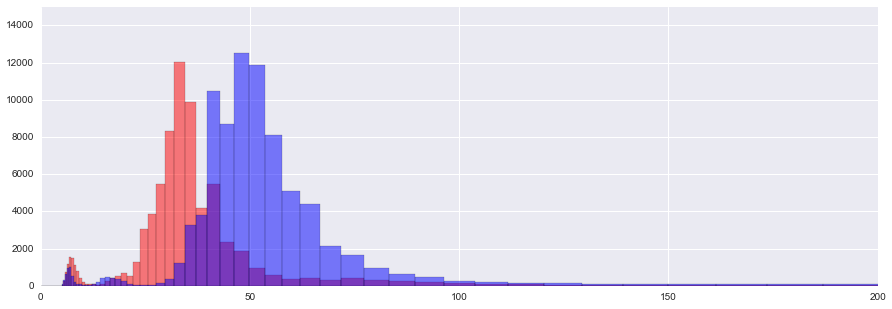

In [222]:
plt.figure(figsize=(15,5))
plt.hist(X,bins=np.exp(np.linspace(-10,12,300)),alpha=0.5, color='red')
plt.hist(Y,bins=np.exp(np.linspace(-10,12,300)),alpha=0.5, color='blue')
plt.axes().set_ylim(0,15000)
plt.axes().set_xlim(0,200)

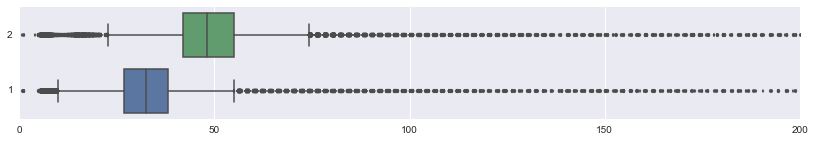

In [233]:
X = np.loadtxt("DataSets/HistogramAPI_samples_1.csv", delimiter=",")
Y = np.loadtxt("DataSets/HistogramAPI_samples_10.csv", delimiter=",")

plt.figure(figsize=(14,2))
sns.boxplot([X,Y], vert=False)
ax = plt.axes().set_xlim(0,200)

In [225]:
def plot_qq(X,Y,n=10):
    QX = []
    QY = []
    for q in np.linspace(0,1,n):
        QX.append(quantile(q,X))
        QY.append(quantile(q,Y))
    
    plt.scatter(QX,QY)
    d0 = min(min(QX), min(QY))
    d1 = max(max(QX),max(QY))
    plt.plot([d0,d1],[d0,d1])

(0, 200)

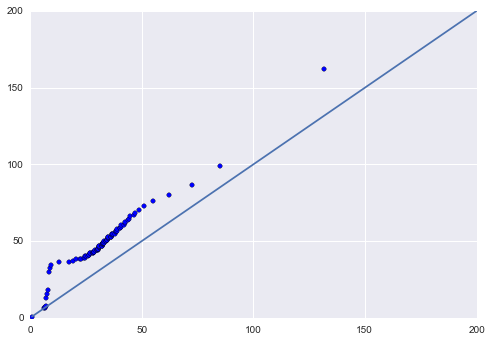

In [232]:
import random
ax = plt.axes()
plot_qq(X,Y, 100)
ax.set_xlim(0,200)
ax.set_ylim(0,200)

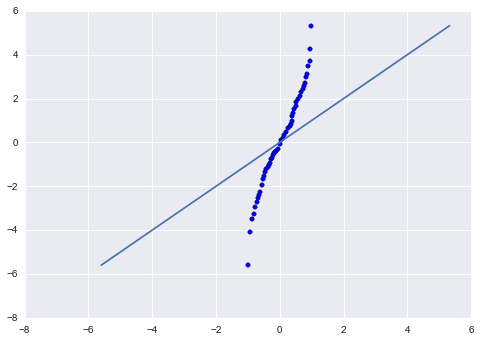

In [226]:
X = [ np.random.rand()*2 - 1 for x in xrange(300) ]
Y = [ np.random.normal(0,2) for x in xrange(300) ]
plot_qq(X,Y,50)

# Modes of Distribution

* mvalues

# Ordered data and Time Series

* Exploring Relationships
  - Scatterplot

* Regression
  - Linear
  - Exponential
  - Ploynomial

# PART II: Data Handling and Visualization


## Data Formats

* Handling text streams
  - head, tail
  - perl -pe

* Handling csv files

* Handling JSON Files


## Plotting

* feedgnuplot
* Import to Drive
* Import to python

(Is a little hard. Better tools to come -> Ask your Monitoring vendor)

# Data Handling

## General Remarks
- know your data sources well (APIs)
- script data access for common tasks (bash, python)
- frequent tasks should be a single command
- learn a scripting language (C/C++/Java are too verbose)
- work on Unix

## Use CSV files
- Official Standard (i.e. supported by Excel)
- Portable (if you stick to ASCII or utf-8)
- Human readable
- Good tooling (cat, grep, sed, csvkit)
- Can be used like SQL tables (e.g. Join tables for many-many relations)
- XML/JSON are describing trees (not lists or tables)
- Use compression (zcat or cat | gzip -d to read and | gzip > out.csv)

## Use UNIX
- Rich set of data mangling tools available
- Pipes to compose tools
- Plotting from command line
- E.g. can use ssh to connect to remote servers (get CPU stats from remote)
- Does not hide the details (lilke Windows UIs). Can work with streams (not only files).

## CSV Files

## Exercises

* Plot CPU Utilization
* Compute median and quantiles for API latencies

# Part III: Pribability Theory

# Ressources

* Seaborn: statistical data visualization - http://stanford.edu/~mwaskom/software/seaborn/